### 출생아 수 및 합계 출산율

#### 합계 출산율 : 한 여자가 가임기간 (15~49세)에 낳을 것으로 기대되는 평균 출생아 수

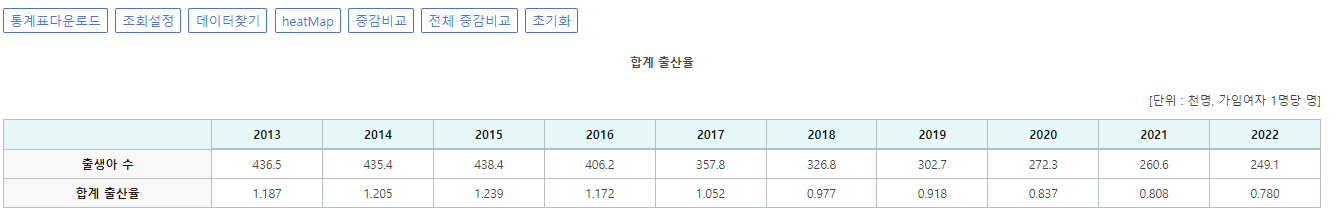

In [ ]:
!pip install koreanize_matplotlib

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# 한글 폰트 설정
import koreanize_matplotlib

import warnings
warnings.simplefilter(action='ignore')

import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### 1. 데이터 로드
- stat.xlsx

In [ ]:
df = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/분석프로젝트/data/stat.xlsx', skiprows=2, nrows=2, index_col=0)
df

,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
출생아 수,436.500,435.400,438.400,406.200,357.800,326.800,302.700,272.300,260.600,249.10
합계 출산율,1.187,1.205,1.239,1.172,1.052,0.977,0.918,0.837,0.808,0.78


In [ ]:
# 인덱스
df.index

Index(['출생아 수', '합계 출산율'], dtype='object')

In [ ]:
df.index.values

array(['출생아\xa0수', '합계\xa0출산율'], dtype=object)

In [ ]:
# 인덱스 명 수정
# 출생아\xa0수 → 출생아 수

# 컬럼명 수정
# df.columns = [수정할 컬럼명 포함 전체 컬럼명]
# df.rename(columns={"원본":"변경후"}, index={"원본":"변경후"})

# df.index = ['출생아 수','합계 출산율']
df.rename(index={'출생아\xa0수':'출생아 수', '합계\xa0출산율':'합계 출산율'},inplace=True)
df.index.values

array(['출생아 수', '합계 출산율'], dtype=object)

In [ ]:
# 출생아 수 : index
# loc : label 이용
# iloc : 위치 인덱스

df.loc['출생아 수']

2013    436.5
2014    435.4
2015    438.4
2016    406.2
2017    357.8
2018    326.8
2019    302.7
2020    272.3
2021    260.6
2022    249.1
Name: 출생아 수, dtype: float64

In [ ]:
# 행열 바꿈 : transpose() or

# df.transpose()

df1 = df.T
df1

,출생아 수,합계 출산율
2013,436.5,1.187
2014,435.4,1.205
2015,438.4,1.239
2016,406.2,1.172
2017,357.8,1.052
2018,326.8,0.977
2019,302.7,0.918
2020,272.3,0.837
2021,260.6,0.808
2022,249.1,0.780


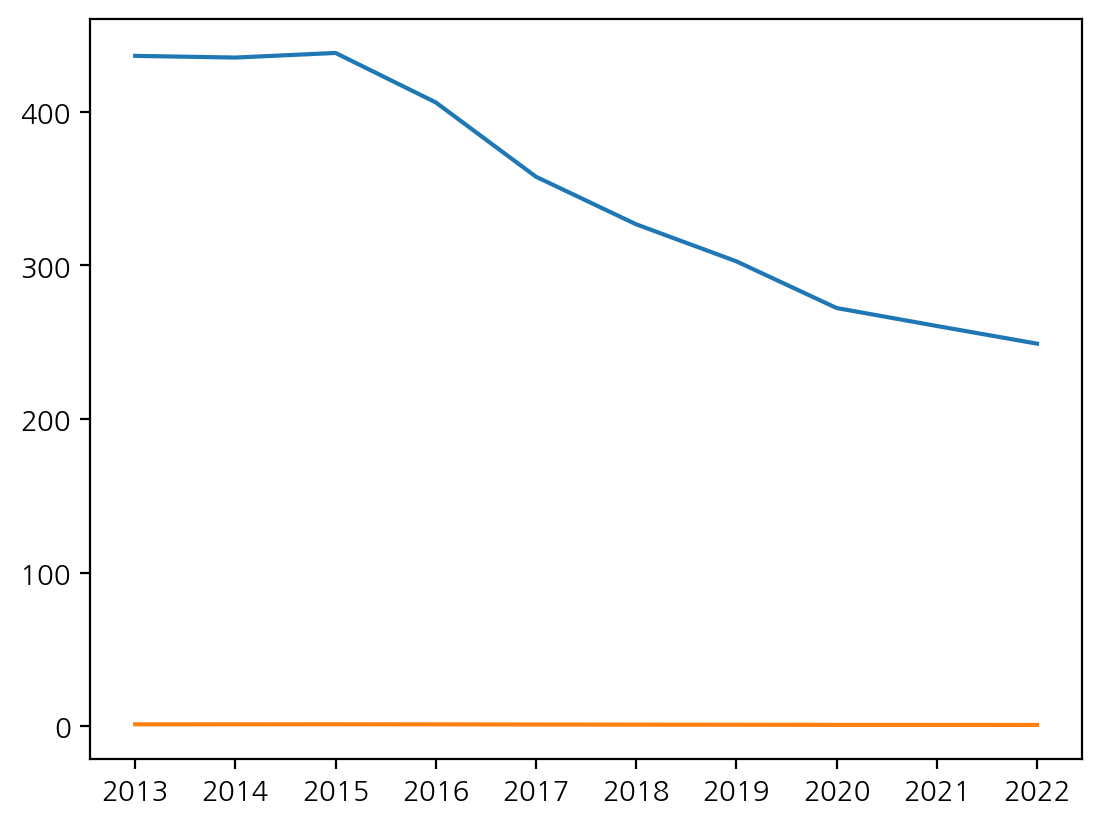

In [ ]:
# 선 차트 작성
# matplotlib
plt.plot(df1.index, df1['출생아 수']);
plt.plot(df1.index, df1['합계 출산율']);

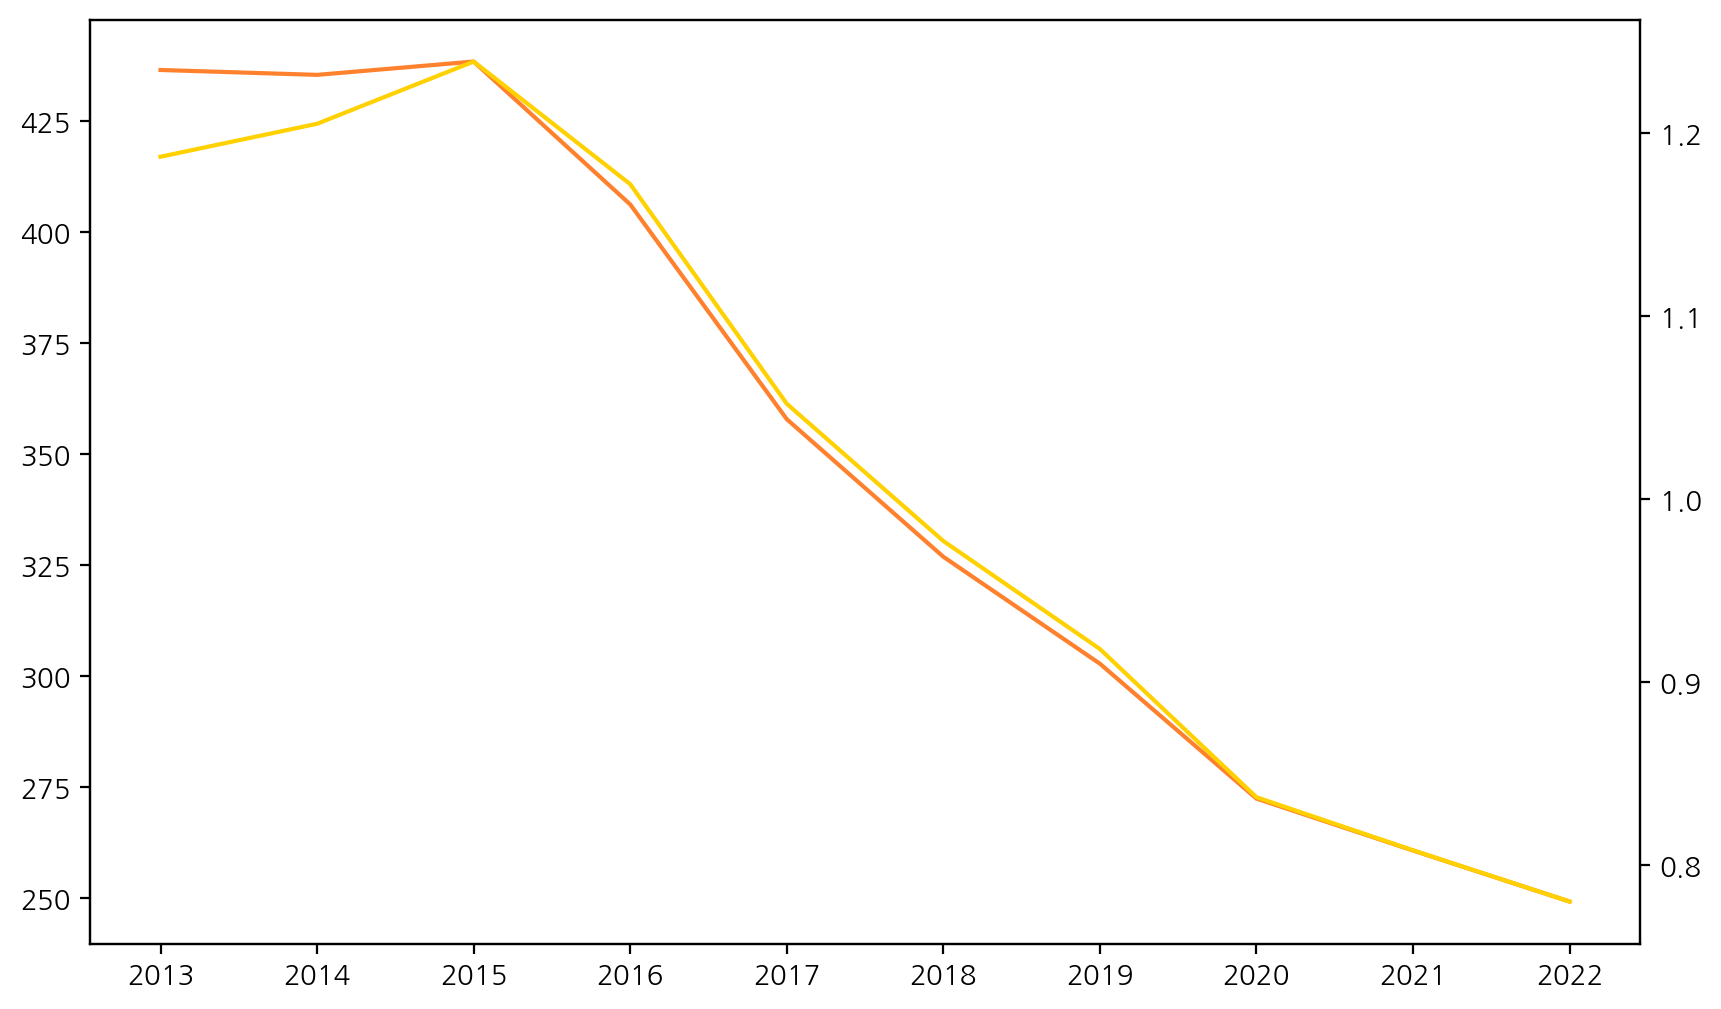

In [ ]:
# 축 설정
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(df1.index, df1['출생아 수'], color="#ff812d");

# z축
ax2 = ax.twinx()
ax2.plot(df1.index, df1['합계 출산율'], color="#ffd100");

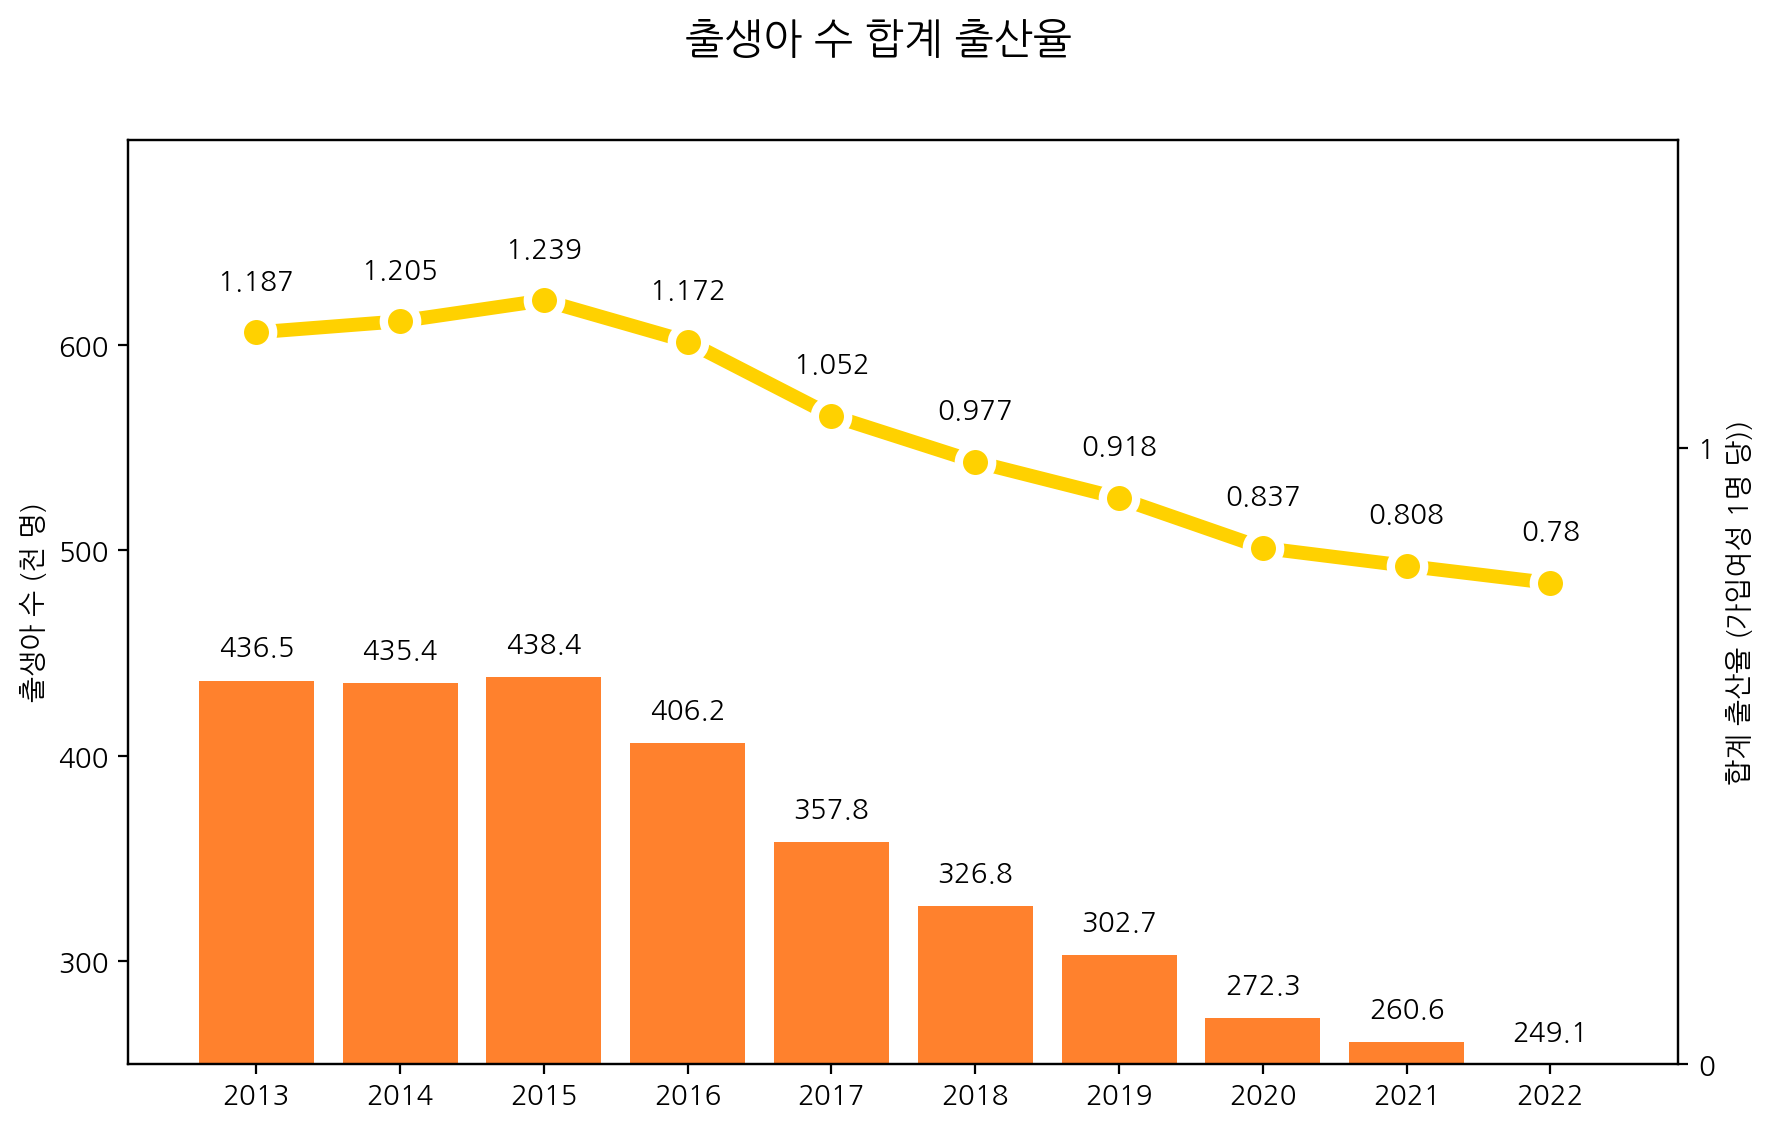

In [ ]:
# mec - marker edge color / mew - marker edge width

fig, ax = plt.subplots(figsize=(10,6))
fig.suptitle("출생아 수 합계 출산율", fontsize=15)

ax.set_ylabel('출생아 수 (천 명)')
ax.set_ylim(250,700)
ax.set_yticks([300,400,500,600])
ax.bar(df1.index, df1['출생아 수'], color="#ff812d");

# 숫자
for idx, val in enumerate(df1['출생아 수']):
  plt.text(idx, val + 12, val, ha="center")

# z축
ax2 = ax.twinx()
ax2.set_ylabel('합계 출산율 (가입여성 1명 당))')
ax2.set_ylim(0,1.5)
ax2.set_yticks([0,1])
ax2.plot(df1.index, df1['합계 출산율'], color="#ffd100", marker="o", ms=12, lw=5, mec="w", mew=3);

# 숫자
for idx, val in enumerate(df1['합계 출산율']):
  plt.text(idx, val + 0.07, val, ha="center")

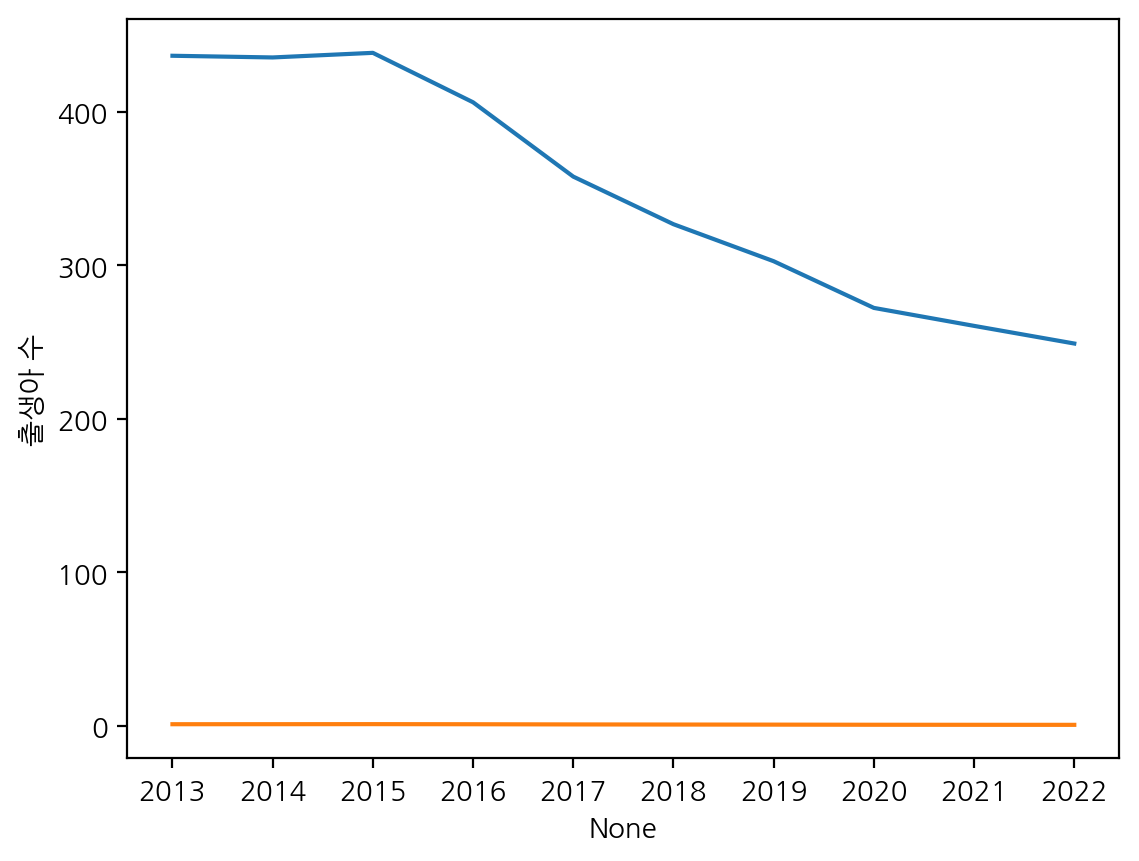

In [ ]:
sns.lineplot(data=df1, x=df1.index, y="출생아 수")
sns.lineplot(data=df1, x=df1.index, y="합계 출산율");